In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Seaborn is built on matplotlib and uses some of its functions directly
# in order to make changes to a plot's display features

In [3]:
# Examine library versions
print("Pandas version: {}".format(pd.__version__))
print("Seaborn version: {}".format(sns.__version__))

Pandas version: 0.23.0
Seaborn version: 0.8.1


In [4]:
# Load gapminder data into a Pandas DataFrame
filename = "gapminder.csv"
gapminder = pd.read_csv(filename)

In [5]:
# Examine shape
# Returns values in format (number of rows, number of columns)
gapminder.shape

(1704, 7)

In [6]:
# Examine columns
gapminder.columns

Index(['Unnamed: 0', 'country', 'continent', 'year', 'lifeExp', 'pop',
       'gdpPercap'],
      dtype='object')

In [7]:
# Examine first few rows
gapminder.head()

,Unnamed: 0,country,continent,year,lifeExp,pop,gdpPercap
0,1,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,2,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,3,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,4,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,5,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [8]:
### Build a basic scatterplot ###

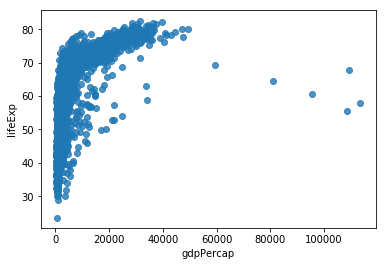

In [9]:
# Figure 3.4 with Seaborn defaults
# as an axes object
sns.regplot(x="gdpPercap", y="lifeExp", data=gapminder, fit_reg=False)

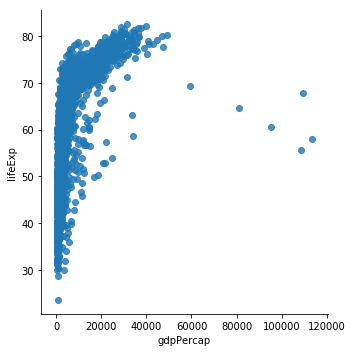

In [10]:
# Figure 3.4 with Seaborn defaults
# as a FacetGrid object
sns.lmplot(x="gdpPercap", y="lifeExp", data=gapminder, fit_reg=False)

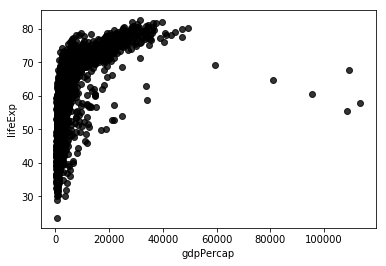

In [11]:
# Figure 3.4 with color matched to book figure
# Note that book figure's grid lines were not reproduced
# (they're not part of the Seaborn default and are complicated to add)
sns.regplot(x="gdpPercap", y="lifeExp", data=gapminder, fit_reg=False, color="black")

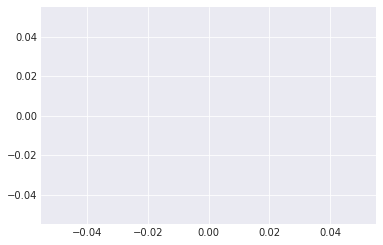

In [16]:
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots()
    ax.plot(x=gapminder["gdpPercap"], y=gapminder["lifeExp"])     

In [ ]:
### NOTE ON Figures 3.5 and 3.6: Life expectancy vs. GDP, using a smoother ###

# An exact replica of figures 3.5 and 3.6 is not achievable due to unavailability
# of the smoothing function.
#
# Per the ggplot2 documentation, the geom_smooth() function used in this figure 
# is the gam() function (from the mgcv library) if the data's observation count is > 1000
# Seaborn does not offer a similar function.
# 
# From the documentation:
#     For method = "auto" the smoothing method is chosen based on the size of the largest group 
#     (across all panels). loess() is used for less than 1,000 observations; otherwise mgcv::gam() 
#     is used with formula = y ~ s(x, bs = "cs")
# Source: https://ggplot2.tidyverse.org/reference/geom_smooth.html
# Retrieved 16 April 2019



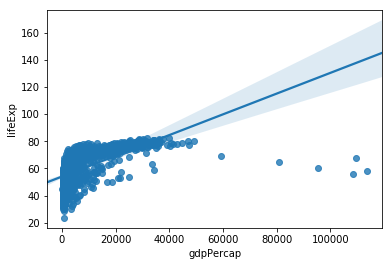

In [19]:
# Figure 3.7: Life expectancy vs GDP, points and an ill-advised linear fit
sns.regplot(x="gdpPercap", y="lifeExp", data=gapminder, scatter=True)

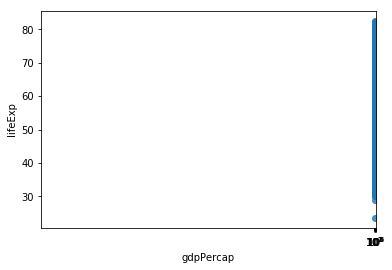

In [27]:
# Figure 3.8: Life expectancy vs GDP scatterplot, with a GAM smoother and a log scale on the x-axis
# NOTE: The seaborn plot does not use a GAM smoother. It uses lowess instead (called "loess" in ggplot)
# The seaborn plot is provided to demonstrate applying a log scale on the x axis

sns.regplot(x="gdpPercap", y="lifeExp", data=gapminder, scatter=True, lowess=True)
plt.xscale('log')

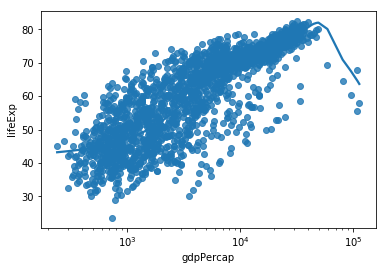

In [32]:
# Changing the axis scale requires access to the underlying matplotlib axis object
# 

f, ax = plt.subplots()
ax.set(xscale='log')
sns.regplot(x="gdpPercap", y="lifeExp", data=gapminder, scatter=True, lowess=True, ax=ax)

In [12]:
help(sns.lmplot)

Help on function lmplot in module seaborn.regression:

lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, size=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    comparison, followed by ``col`` and ``row``. Howe

In [13]:
help(sns.set)

Help on function set in module seaborn.rcmod:

set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
    Set aesthetic parameters in one step.
    
    Each set of parameters can be set directly or temporarily, see the
    referenced functions below for more information.
    
    Parameters
    ----------
    context : string or dict
        Plotting context parameters, see :func:`plotting_context`
    style : string or dict
        Axes style parameters, see :func:`axes_style`
    palette : string or sequence
        Color palette, see :func:`color_palette`
    font : string
        Font family, see matplotlib font manager.
    font_scale : float, optional
        Separate scaling factor to independently scale the size of the
        font elements.
    color_codes : bool
        If ``True`` and ``palette`` is a seaborn palette, remap the shorthand
        color codes (e.g. "b", "g", "r", etc.) to the colors from this pal

In [14]:
help(sns.axes_style)

Help on function axes_style in module seaborn.rcmod:

axes_style(style=None, rc=None)
    Return a parameter dict for the aesthetic style of the plots.
    
    This affects things like the color of the axes, whether a grid is
    enabled by default, and other aesthetic elements.
    
    This function returns an object that can be used in a ``with`` statement
    to temporarily change the style parameters.
    
    Parameters
    ----------
    style : dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
        A dictionary of parameters or the name of a preconfigured set.
    rc : dict, optional
        Parameter mappings to override the values in the preset seaborn
        style dictionaries. This only updates parameters that are
        considered part of the style definition.
    
    Examples
    --------
    >>> st = axes_style("whitegrid")
    
    >>> set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    
    >>> import matplotlib.pyplot as plt
   